# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import plotly.express as px
from xgboost import XGBClassifier
import optuna
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.utils import shuffle
import shap

# Reading data


In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Statistical information 

In [3]:
print('The dimention of data is :',df.shape)

The dimention of data is : (374, 13)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Exploratory Data Analysis

In [6]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [7]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

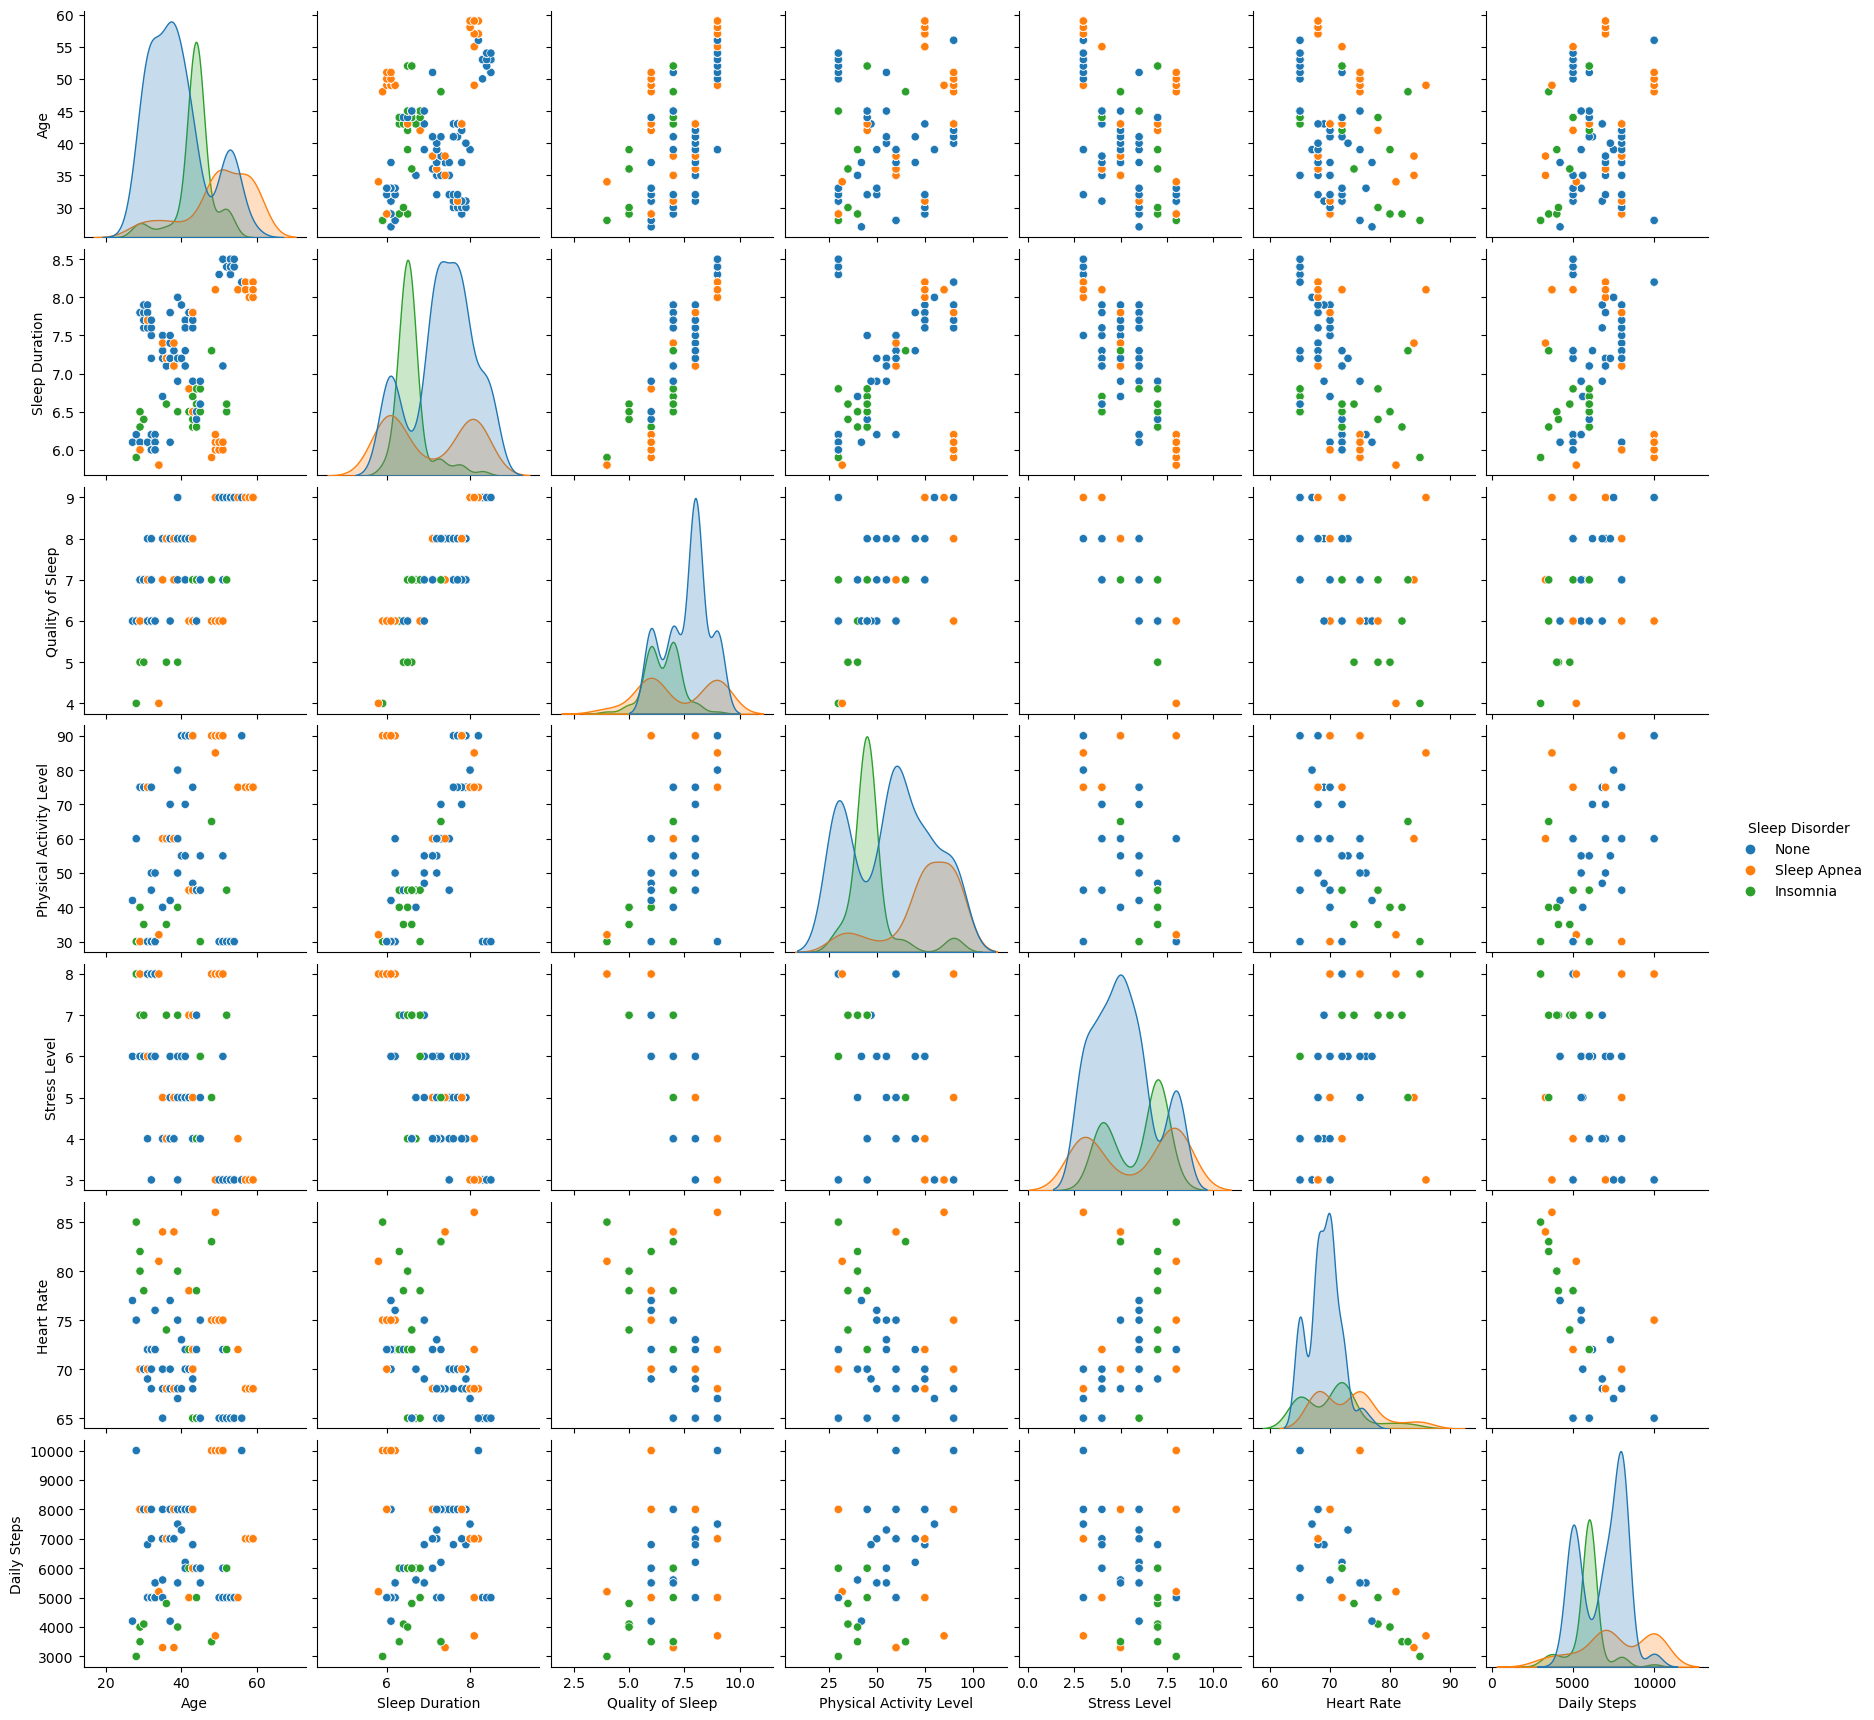

In [8]:
sns.pairplot(data=df.drop('Person ID',axis=1),hue='Sleep Disorder')

In [9]:
classes=df['Sleep Disorder'].unique()
print('The outputs from the classification are :',classes)

The outputs from the classification are : ['None' 'Sleep Apnea' 'Insomnia']


In [10]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [11]:
df.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: Gender, dtype: int64

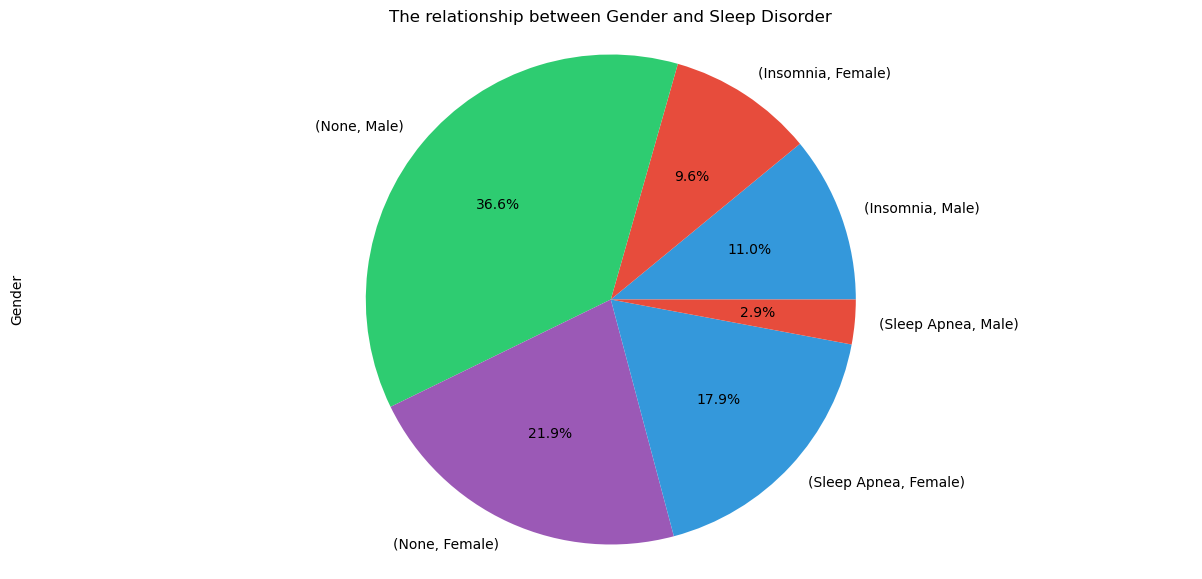

In [12]:
df.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15, 7),
                                                                colors=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])
plt.title('The relationship between Gender and Sleep Disorder')
plt.axis('equal')
plt.show()


In [13]:
df.groupby('Sleep Disorder')['Occupation'].value_counts()

Sleep Disorder  Occupation          
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Doctor                   3
                Nurse                    3
                Lawyer                   2
                Software Engineer        1
None            Doctor                  64
                Engineer                57
                Lawyer                  42
                Accountant              30
                Nurse                    9
                Teacher                  9
                Software Engineer        3
                Salesperson              2
                Scientist                2
                Manager                  1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                S

In [14]:
fig = px.treemap(df, path=[px.Constant('Jobs'), 'Sleep Disorder', 'Occupation'],
                 color='Sleep Disorder',
                 color_discrete_sequence=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])

fig.update_layout(title='<b>The Effect of Job on Sleep</b>',
                  title_font={'size': 20})

fig.show()

In [15]:
fig=px.sunburst(df,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',values='Sleep Duration',
              color_discrete_sequence=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'],
              hover_data=['Gender'])

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>..',
                 title_font={'size':25})

fig.show()

In [16]:
fig = px.violin(df, x="Sleep Disorder",y='Physical Activity Level',
                 color='Sleep Disorder',
                 color_discrete_sequence=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'],
                 violinmode='overlay')
               
    
fig.update_layout(title='<b>The effect of activities on sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')

fig.update_yaxes(showgrid=False)
fig.show()

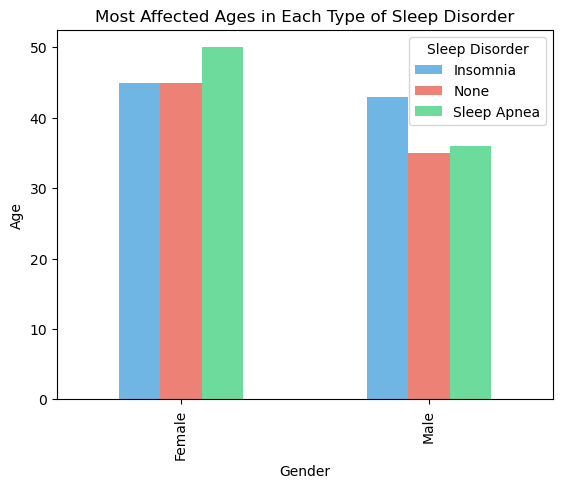

In [17]:
df.pivot_table(index='Gender', columns='Sleep Disorder', values='Age', aggfunc='median').plot(kind='bar', 
                                                                                             color=['#3498db', '#e74c3c', '#2ecc71'], 
                                                                                             title='Most Affected Ages in Each Type of Sleep Disorder',
                                                                                             xlabel='Gender', 
                                                                                             ylabel='Age',
                                                                                             alpha=0.7)


plt.show()

In [18]:
fig=px.ecdf(df,x='Age',
            color='Sleep Disorder',
            color_discrete_sequence=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])


fig.update_layout(title='<b>The effect of ages on sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [19]:
fig=px.histogram(df,x='Sleep Disorder',y='Sleep Duration',
                 color='Sleep Disorder',color_discrete_sequence=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'],
                 text_auto=True)



fig.update_layout(title='<b>The effect of Sleep Duration on Sleep Disorder</b> ..',
                  titlefont={'size': 24,'family': 'Serif'},
                  showlegend=True, 
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)




fig.show()

In [20]:
fig=px.scatter_3d(df,x='BMI Category',y='Blood Pressure',z='Heart Rate',
                  color='Sleep Disorder',width=1000,height=900,
                  color_discrete_sequence=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])


fig.update_layout(title='<b>The relationship between (BMI Category , Blood Pressure and Heart Rate) and their effect on  Sleep Disorder</b> ..',
                  titlefont={'size': 20,'family': 'Serif'},
                  showlegend=True)



fig.show()

In [21]:
fig=px.histogram(df,x='Sleep Disorder',
                 color='Sleep Disorder',
                 facet_col='Stress Level',
                 barmode='group',
                 color_discrete_sequence=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'],
                 opacity=.8)


fig.update_layout(title='<b>The effect of Stress Level on Sleep Disorder</b> ..',title_font={'size':30},
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)
fig.show()

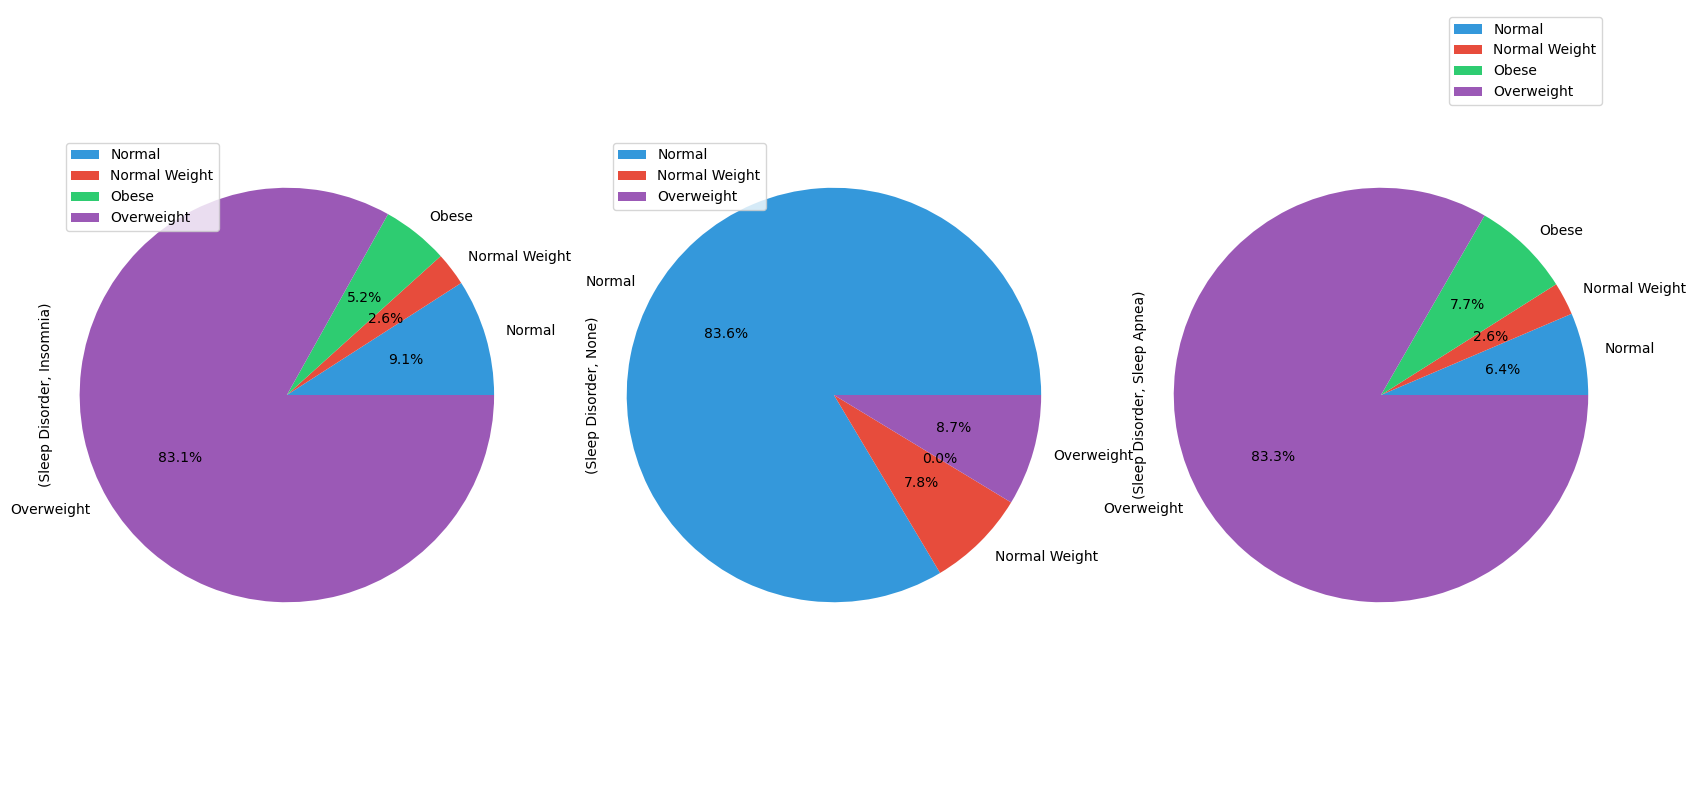

In [22]:
pie_colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
df.pivot_table(index='BMI Category', columns='Sleep Disorder', aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct='%1.1f%%',
                                                                                                            subplots=True, figsize=(20, 10),
                                                                                                            colors=pie_colors)
plt.axis('equal') 
plt.show()

# Data preprocessing

In [23]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [24]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [25]:
df['Blood Pressure']=df['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)

In [26]:
df["Age"]=pd.cut(df["Age"],2)
df["Heart Rate"]=pd.cut(df["Heart Rate"],4)
df["Daily Steps"]=pd.cut(df["Daily Steps"],4)
df["Sleep Duration"]=pd.cut(df["Sleep Duration"],3)
df["Physical Activity Level"]=pd.cut(df["Physical Activity Level"],4)

In [27]:
LE=LabelEncoder()

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    df[label]=LE.fit_transform(df[label])
display(df)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,0,9,0,6,0,6,3,0,2,0,1
1,2,1,0,1,0,6,1,8,0,0,1,3,1
2,3,1,0,1,0,6,1,8,0,0,1,3,1
3,4,1,0,6,0,4,0,8,2,1,3,0,2
4,5,1,0,6,0,4,0,8,2,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,1,5,2,9,2,3,3,1,0,2,2
370,371,0,1,5,2,9,2,3,3,1,0,2,2
371,372,0,1,5,2,9,2,3,3,1,0,2,2
372,373,0,1,5,2,9,2,3,3,1,0,2,2


In [28]:
df.drop(['Person ID'], axis=1, inplace=True)

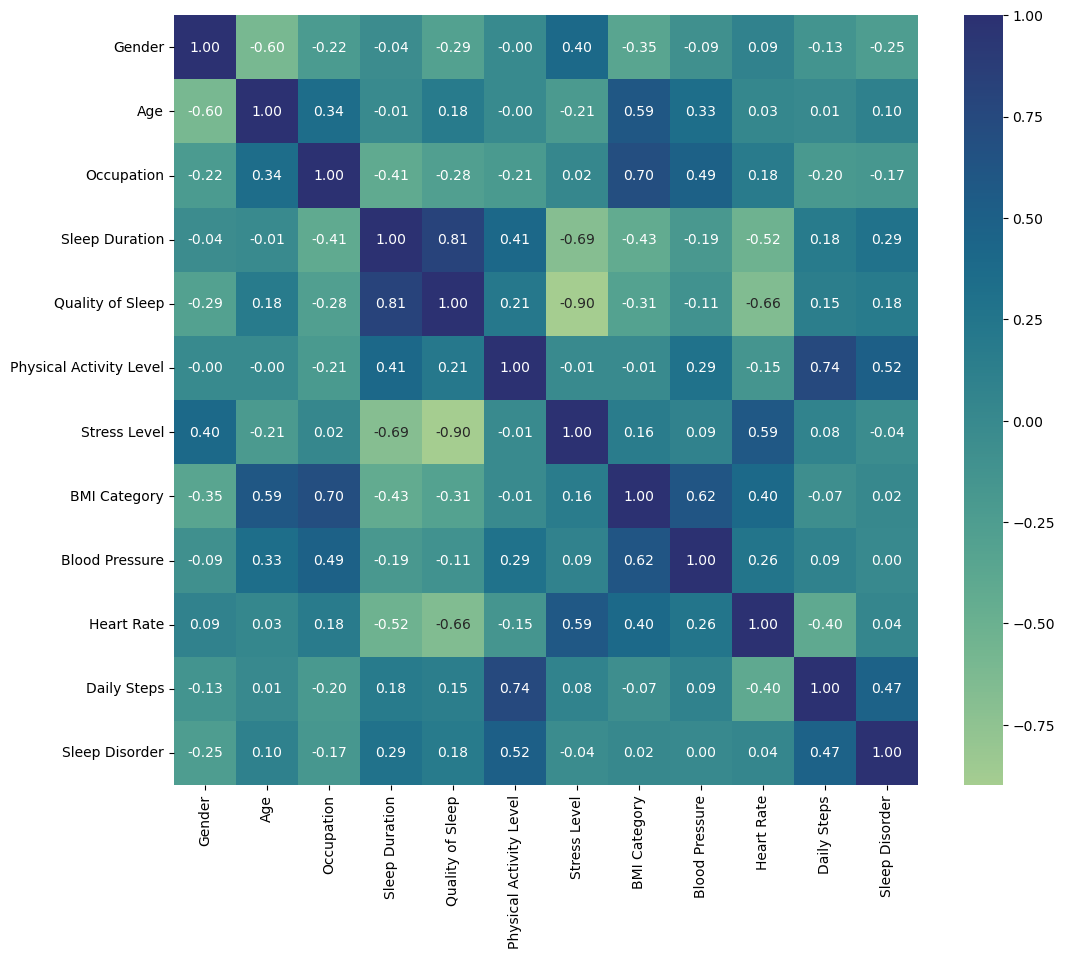

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.show()

# Data splitting

In [30]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=32,shuffle=True)

# Data modeling 

In [31]:
def objective(trial):
    C = trial.suggest_loguniform('C', 0.1, 10)
    
    LR = LogisticRegression( C=C, solver='liblinear')
    
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params

LRB = LogisticRegression(**best_params)
LRB.fit(x_train, y_train)

y_pred = LRB.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

[I 2024-02-21 16:44:22,970] A new study created in memory with name: no-name-a0a25619-a675-4caf-8a1b-7cf58dddb88b
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11872\1813974084.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-02-21 16:44:22,983] Trial 0 finished with value: 0.9193548387096774 and parameters: {'C': 1.1497242353299115}. Best is trial 0 with value: 0.9193548387096774.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11872\1813974084.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-02-21 16:44:22,991] Trial 1 finished with value: 0.9032258064516129 and parameters: {'C': 0.11489957961393371}. Best is trial 0 with value: 0.91935

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11872\1813974084.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-02-21 16:44:23,057] Trial 8 finished with value: 0.9032258064516129 and parameters: {'C': 7.0939813226946065}. Best is trial 0 with value: 0.9193548387096774.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11872\1813974084.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-02-21 16:44:23,065] Trial 9 finished with value: 0.9193548387096774 and parameters: {'C': 0.9480614318653101}. Best is trial 0 with value: 0.9193548387096774.
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11872\1813974084.py:2: FutureWarning:

suggest_log

Accuracy: 90.32%


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [32]:

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1, 100),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0)
    }
    
    xgb = XGBClassifier(**params)
    
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params

xgbB = XGBClassifier(**best_params)
xgbB.fit(x_train, y_train)

y_pred = xgbB.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

[I 2024-02-21 16:44:24,392] A new study created in memory with name: no-name-25e669fc-9af7-4ba8-b640-e537a2d502c5
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11872\4036759402.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11872\4036759402.py:6: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11872\4036759402.py:7: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11872\4036759402.py:8: F

Accuracy: 92.74%


In [33]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0)
    }
    
    GB = GradientBoostingClassifier(**params)
    
    GB.fit(x_train, y_train)
    y_pred = GB.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params

GBB = GradientBoostingClassifier(**best_params)
GBB.fit(x_train, y_train)

y_pred = GBB.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

[I 2024-02-21 16:45:39,379] A new study created in memory with name: no-name-3ceb1e8f-73f8-4ff3-99d4-2d96d636c5d6
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11872\2676347278.py:4: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11872\2676347278.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-21 16:45:41,175] Trial 0 finished with value: 0.9112903225806451 and parameters: {'n_estimators': 566, 'learning_rate': 0.05285914426616203, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 18, 'subsample': 0.5590911621539327}. Best is trial 0 with value: 0.9112903225806451.
C:\Users\Administrator\AppData\Local\Temp

Accuracy: 91.13%


In [34]:
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    }
    
    
    RF = RandomForestClassifier(**params)
    
    RF.fit(x_train, y_train)
    y_pred = RF.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)

best_params_rf = study_rf.best_params

RFB = RandomForestClassifier(**best_params_rf)
RFB.fit(x_train, y_train)

y_pred_rf = RFB.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy: {:.2f}%".format(accuracy_rf * 100))

[I 2024-02-21 16:48:17,454] A new study created in memory with name: no-name-e5aa28d6-a9b5-4855-9ac8-a4d0cfbaaa1f
[I 2024-02-21 16:48:17,773] Trial 0 finished with value: 0.9112903225806451 and parameters: {'n_estimators': 347, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.9112903225806451.
[I 2024-02-21 16:48:18,189] Trial 1 finished with value: 0.9032258064516129 and parameters: {'n_estimators': 478, 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9112903225806451.
[I 2024-02-21 16:48:18,990] Trial 2 finished with value: 0.9032258064516129 and parameters: {'n_estimators': 817, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.9112903225806451.
[I 2024-02-21 16:48:19,693] Trial 3 finished with value: 0.8790322580645161 and parameters: {'n_estimators': 877, 'max_depth': 8, 'mi

Accuracy: 91.13%


In [35]:
LR_y_pred=LRB.predict(x_test)
xgb_y_pred=xgbB.predict(x_test)
Gb_y_pred=GBB.predict(x_test)
Rf_y_pred=RFB.predict(x_test)

# Models evaluation

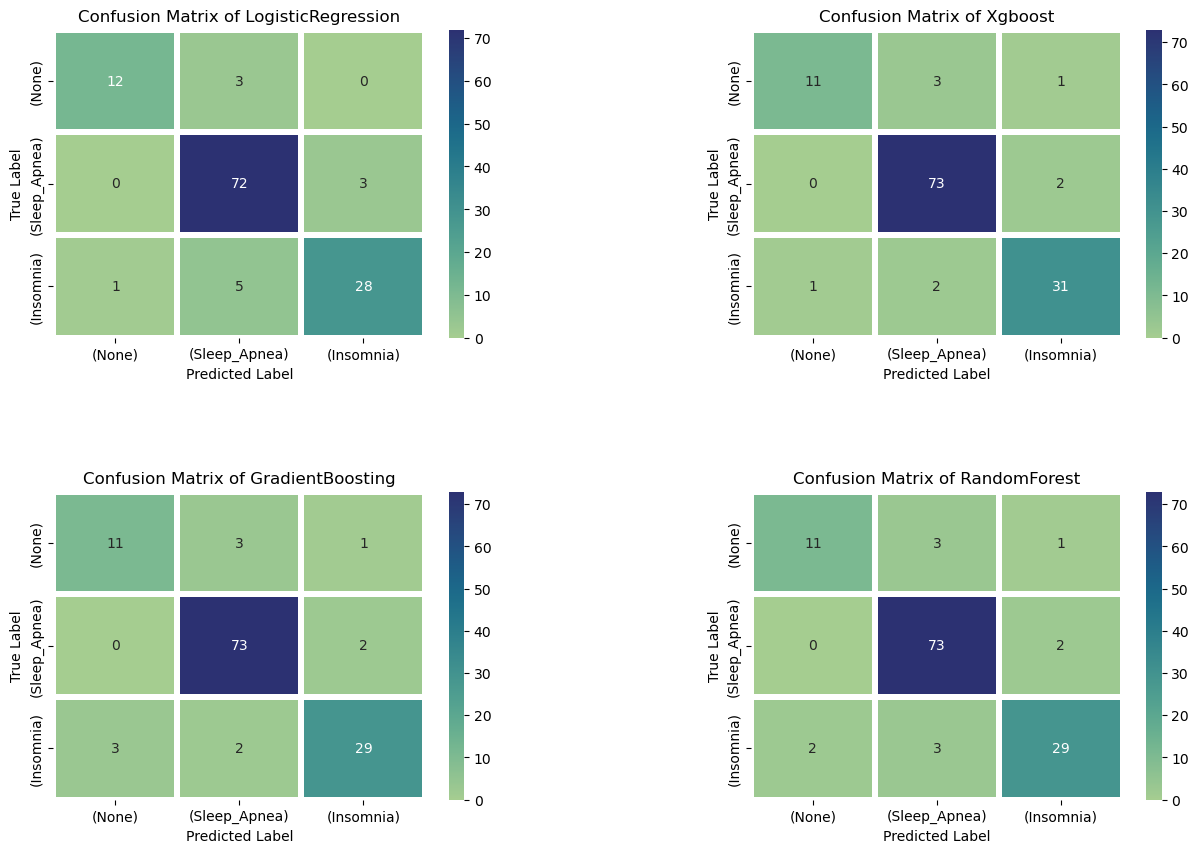

In [36]:


models_predictions = [LR_y_pred, xgb_y_pred, Gb_y_pred, Rf_y_pred]
model = {1: 'LogisticRegression', 2: 'Xgboost', 3: 'GradientBoosting', 4: 'RandomForest'}

plt.figure(figsize=(15, 10)) 
for i, y_pred in enumerate(models_predictions, 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 2, i)
    sns.heatmap(cm, cmap='crest', linewidth=3, fmt='', annot=True,
                xticklabels=['(None)', '(Sleep_Apnea)', '(Insomnia)'],
                yticklabels=['(None)', '(Sleep_Apnea)', '(Insomnia)'])
    plt.title('Confusion Matrix of ' + model[i])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


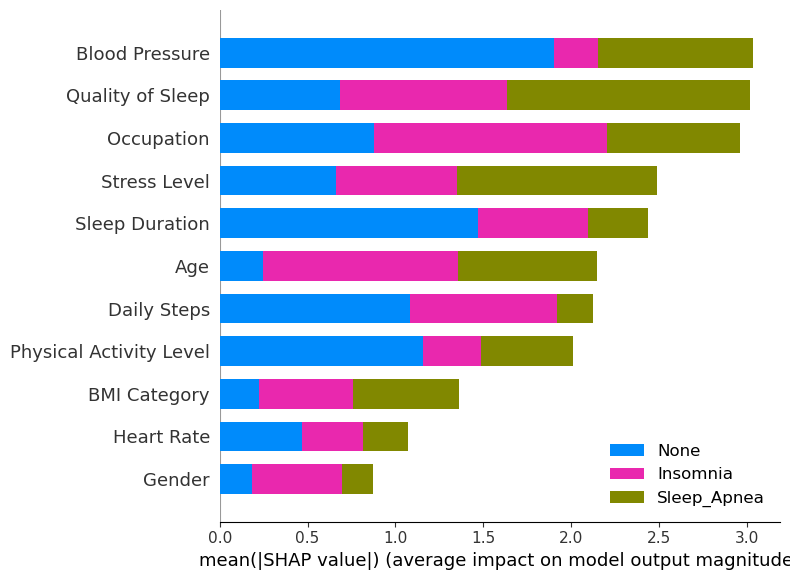

In [37]:
shap_values = shap.TreeExplainer(xgbB).shap_values(x_test)
shap.summary_plot(shap_values, x_test,class_names=['None','Sleep_Apnea','Insomnia'])